## One Body Gravitational Problem
#### We will consider the motion of an object under the influnce of another massive object whose motion we neglect.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### The acceleration function

In [2]:
def aVec(rVec):
    
    # Physical Constants
    G = 6.673e-11    #MKS units
    M = 1.99e30      #Mass of the Sun in Kg
    GM = G * M
    
    x = rVec[0]
    y = rVec[1]
   
    # Calculate R cube
    RCube = (x**2 + y**2)**(1.5)
    
    # acceleration
    aX = -GM *(x/RCube)
    aY = -GM * (y/RCube)
    
    # return the acceleration vector
    return np.array([aX, aY]) 
    

### The energy function

In [3]:
def energy(rVec, vVec):
    # Physical Constants
    G = 6.673e-11    #MKS units
    M = 1.99e30      #Mass of the Sun in Kg
    GM = G * M
    
    # find the magnitude of vectors
    r = np.linalg.norm(rVec)
    v = np.linalg.norm(vVec)
    
    return 0.5 * v**2 - GM/r 
    

### The angular momentum function

In [4]:
def L(rVec, vVec):
    x = rVec[0]
    y = rVec[1]
    vx = vVec[0]
    vy = vVec[1]
    return x*vy - y*vx

### The intial conditions for Earth

#### Initial position

In [5]:
R = 2.0e11 #Earths distance from the Sun in meters
r0 = R * np.array([1.0,0.0]) # intial position vector

#### Initial Velocity

In [6]:
v0 =  0.1e4 # Magnitude of the Earth's velocity
v0vec = v0 * np.array([0.0, 1.0]) # initally moving along the y axis

### Time Interval over which we will observe the motion

In [7]:
T =  (365 * 24 * 60 * 60) # we observe for 5 years - in sec
deltaT = 10.0               # observe the motion every hour
N = int(T/deltaT)            # Number of steps

### Simulation

#### Array of vectors to store position vector, velocity vector and energy

In [8]:
rVectors = np.zeros((N+1, 2), float)
vVectors = np.zeros((N+1, 2), float)
energyArray = np.zeros(N+1, float)
Larray = np.zeros(N+1, float)

#### Array of time instants

In [9]:
tArray = np.zeros(N+1, float)

#### Calculate the motion

#### Set up the initial conditions for leap frog method

In [10]:
rVectors[0] = r0
vVectors[0] = v0vec + aVec(r0)*deltaT/2.0 # velocity at the midpoint 
initEnergy = energy(r0, v0vec)
energyArray[0] = initEnergy
initL = L(r0, v0vec)
Larray[0] = L(r0, v0vec)
print("Initial energy = ", energyArray[0], " angular momentum = ", Larray[0])

Initial energy =  -663463500.0  angular momentum =  200000000000000.0


In [11]:
for n in range(1, N+1):
    tArray[n] = n * deltaT
    rVectors[n] = rVectors[n-1] + vVectors[n-1] * deltaT # using the velocity at the midpoint
    vVectors[n] = vVectors[n-1] + aVec(rVectors[n]) * deltaT # using the position at the midpoint of velocity interval
    
    # conservaton
    Larray[n] = L(rVectors[n], vVectors[n])
    energyArray[n] = energy(rVectors[n], vVectors[n])

### Plot the result

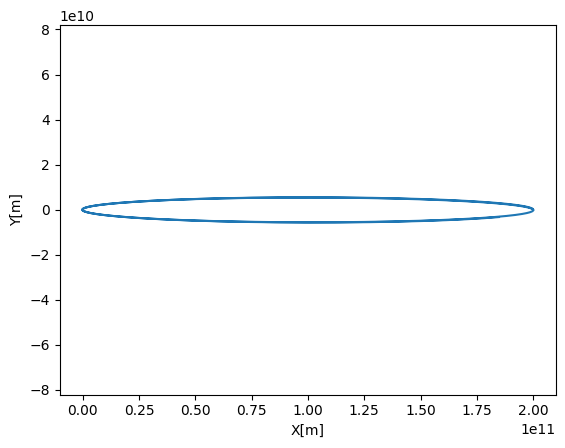

In [12]:
#%matplotlib auto
# x, y components of the vectors
xArray = rVectors[:, 0]
yArray = rVectors[:, 1]

# plot the arrays 
plt.plot(xArray, yArray)

# make the axis equals so circle looks like a circle
plt.axis('equal')

# label the axis
plt.xlabel('X[m]')
plt.ylabel('Y[m]')
# show the plot
plt.show()


Text(0, 0.5, '$\\Delta L/L$')

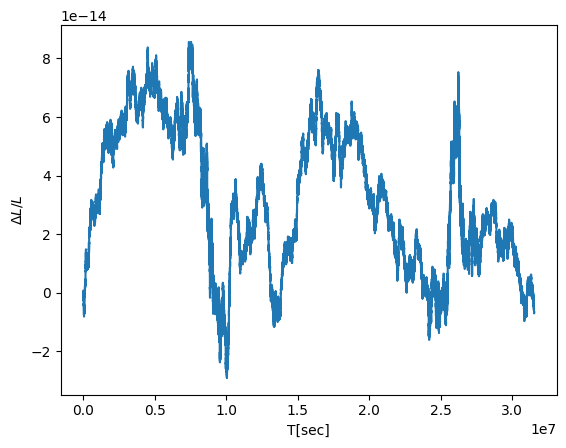

In [13]:
plt.plot(tArray, (Larray - initL)/initL)
plt.xlabel("T[sec]")
plt.ylabel("$\Delta L/L$")
#plt.ylim(0.5, 1.5)

-663463500.0 -663463702.8132645


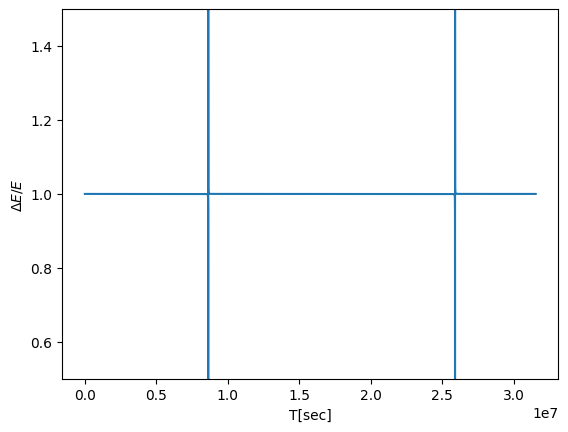

In [14]:
plt.plot(tArray, energyArray/initEnergy)
plt.xlabel("T[sec]")
plt.ylabel("$\Delta E/E$")
plt.ylim(0.5, 1.5)
print(energyArray[0], energyArray[-1])